In [79]:
from PIL import Image
import numpy as np
import math
image_size = 512
canvas_size = 724
offset = int((canvas_size-image_size)/2)

In [80]:
image = Image.open('lena.jpg')
np_img = np.array(image)
canvas = np.zeros((canvas_size,canvas_size),dtype=int)


for y in range(image_size):
    for x in range(image_size):
        canvas[y+offset][x+offset]=np_img[y][x]


In [81]:
def neighbourd(canvas,a):
    rotated_canvas = np.zeros((canvas_size,canvas_size),dtype=int)
    for y in range(canvas_size-1):
        for x in range(canvas_size-1):
            y_p=(x-362)*math.sin(-a) + (y-362)*math.cos(-a) +362
            x_p=(x-362)*math.cos(-a)-(y-362)*math.sin(-a) +362
            #    f=canvas[int(y_p)][int(x_p)]
            if x_p<723 and y_p<723 and x_p>=0 and y_p>=0: 
                
                rotated_canvas[y][x]=canvas[round(y_p)][round(x_p)]# ((Q12[0]-y)/(Q12[0]-Q11[0]))*R1+((y-Q11[0])/(Q12[0]-Q11[0]))*R2
    return rotated_canvas




In [82]:
def compare(img1,img2):

    return (np.square(np.subtract(img1,img2)).sum(), np.absolute(np.subtract(img1,img2)).sum())

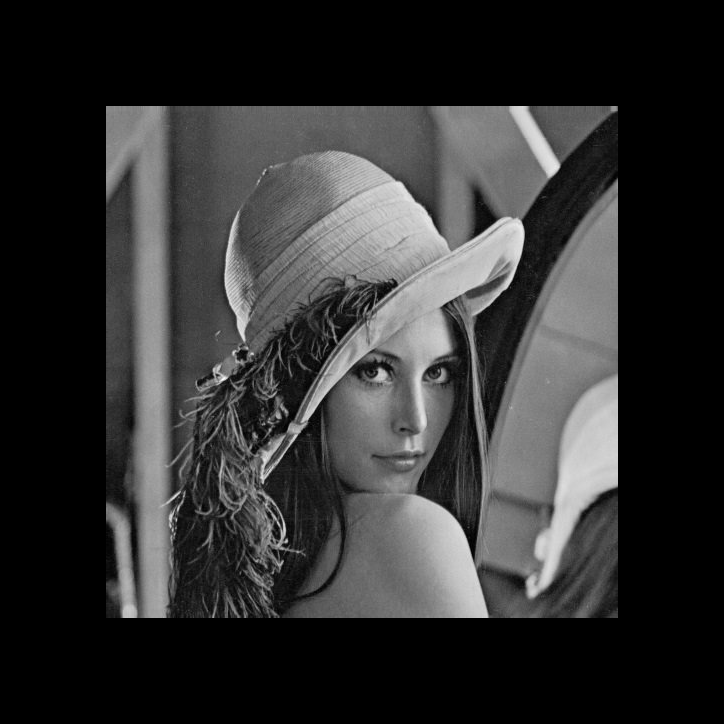

In [83]:
canvas_org=canvas.copy()
Image.fromarray(canvas_org.astype('uint8'), 'L')

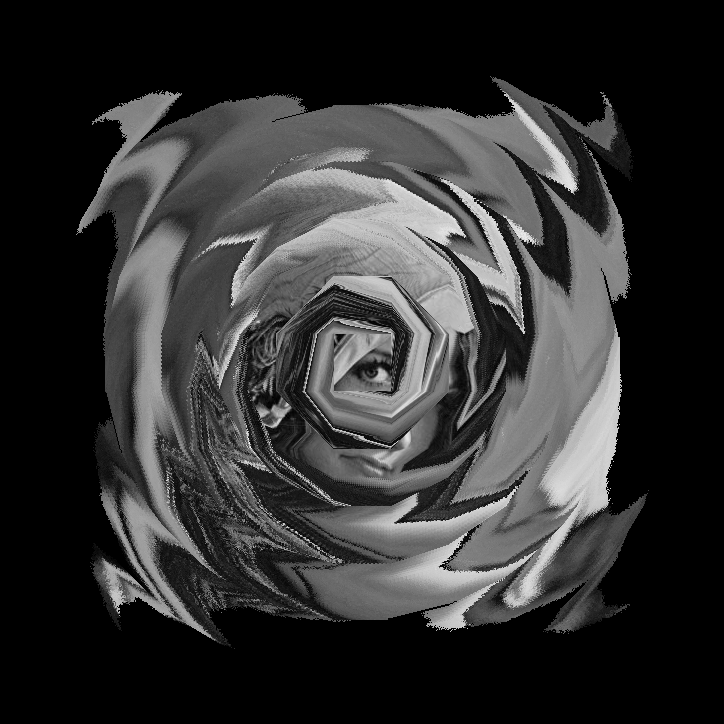

In [84]:
for i in range(360):
    canvas = neighbourd(canvas,(1*math.pi)/180)
Image.fromarray(canvas.astype('uint8'), 'L')

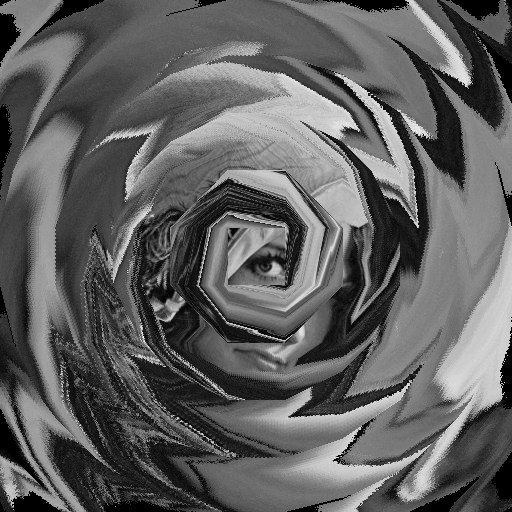

In [85]:
output_img=np.zeros((image_size,image_size),dtype=int)
for y in range(image_size):
    for x in range(image_size):
        output_img[y][x]=canvas[y+offset][x+offset]
Image.fromarray(output_img.astype('uint8'), 'L')

In [86]:
compare(canvas,canvas_org)

(835619993, 9798945)